# Constructing a zero-dimensional energy balance model

In [3]:
#import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Heat Capacity

Heat capacity (C) is the energy (E) required to raise the temperature of a body of a material by 1˚C, independent of mass.

$C=\frac{E}{∆T}$ $J˚C^{-1}$

where $∆T$ is the change in temperature.

<b>Specific heat capacity (c)</b> is the energy needed to heat up 1kg of a material by 1˚C.

$c=\frac{E}{m∆T}$ $Jkg^{-1}˚C^{-1}$

where m is the mass of the body of a material.

Heat capacity of water >> ice > air > land.

## An oversimplified model

The <b>energy flux density at the surface of the Earth</b> can be calculated from the __[inverse square law](https://en.wikipedia.org/wiki/Inverse-square_law#:~:text=In%20science%2C%20an%20inverse%2Dsquare,source%20of%20that%20physical%20quantity.)__, given the power of the Sun $3.86$x$10^{26}W$ ($E_S$), and the distance between the Sun and the Earth $1.5$x$10^{11}m$ ($R$): 

$$S_o=\frac{E_S}{4\pi R^{2}}$$

This is the <b>solar constant $S_o$</b>, which is roughly 1365 $Wm^{-2}$.

Energy balance model is crucial in building a climate model, since atmospheric dynamics are driven by the input of energy into the climate system. 

Let's first make several <b>assumptions</b> about the Earth:
1. It is a perfect blackbody
2. Its albedo is 0.3, which is the average terrestrial albedo
3. It is in radiative equilibrium i.e. energy in = energy out
4. Equal solar irradiation on the surface of the Earth

Recall that albedo is the <b>reflectance of an object over all wavelengths</b>, which measures how well a surface reflects EM radiation. Its value is between 0 and 1, for example 0.1 means 10% of EM radiation incident on the object is reflected, so 90% of it is absorbed. Therefore, albedo is higher for <b>ice and snow (0.9)</b> than that for <b>water (0.06)</b>.

From here, we can start by calculating the energy flux density on the surface of the Earth. 

Earth radius = $R_E$; albedo = $α$ 

We already know the energy flux density at the surface of the Earth = the solar constant $S_o$, so the energy flux density including albedo becomes $S_oA(1-α)$. 

Thus, the energy flux density into the Earth is:

$$M_{in}=S_o(1-α)$$ 

In terms of total energy flux:

$$E_{in}=S_o\pi R_E^2(1-α)$$

The energy flux density emitted is described by __[Stefan-Boltzmann Law](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law)__:

$$M_{out}=σ𝑇_K^{4}$$

where σ=<b>Stefan-Boltzmann constant</b>=$5.6697$x$10^{-8}Wm^{-2}K^{-4}$, and $T_K$ is <b>absolute temperature</b>. In terms of total energy flux:

$$E_{out}=4\pi R_E^2σ𝑇_K^{4}$$

At <b>radiative equilibrium</b>, energy absorbed = energy emitted, thus:

$$E_{in}=E_{out}$$

$$S_o\pi R_E^2(1-α)=4\pi R_E^{2}σ𝑇_K^{4}$$

Eliminating $\pi$ and $R_E$ gives:

$$\frac{S_o(1-α)}{4}=σ𝑇_K^{4}$$ 

Rearranging this equation gives the temperature at the surface of the Earth:

$$T_K=(\frac{S_o(1-α)}{4σ})^{\frac{1}{4}}$$

Substituting albedo=0.3, temperature on the surface of the Earth is <b>-18˚C</b>.

When albedo = 0.3, temperature on Earth is -17˚C.
Even when albedo = 0.0, temperature on Earth would still only be 5˚C


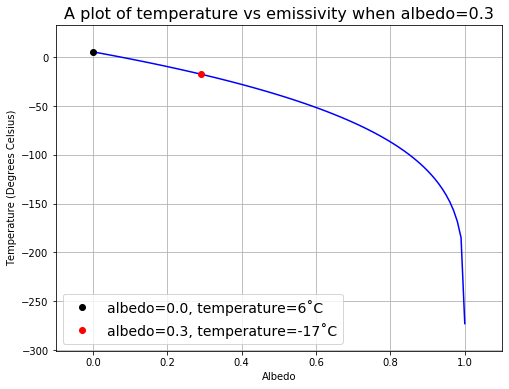

In [9]:
# define a function to calculate temperature in degrees Celsius for a given albedo
# al = albedo, s = stefan-boltzmann constant
def find_temp(al, S_o=1365, s=5.67e-8):
    return ((S_o*(1-al))/(4*s))**0.25-273

# make a list of albedo between 0 and 1
albedo = np.array([0.01*i for i in range(101)])

# calculate temperature for each albedo
temp = find_temp(albedo)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure
ax1.plot(albedo, temp, 'b')
ax1.plot(albedo[0], temp[0], 'ko', label='albedo=%.1f, temperature=%.f˚C' % (albedo[0], temp[0]))
ax1.plot(albedo[29], temp[29], 'ro', label='albedo=%.1f, temperature=%.f˚C' % (albedo[29], temp[29])) 
ax1.set_xlabel('Albedo')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature vs emissivity when albedo=0.3', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

print("When albedo = %.1f, temperature on Earth is %.d˚C." % (albedo[29], temp[29])) 
print("Even when albedo = %.1f, temperature on Earth would still only be %.d˚C" % (albedo[0], temp[0]))

But the average temperature on Earth should be <b>14˚C</b>, a difference of 32˚C. Something must be seriously wrong.

Actually, the assumptions are not valid and are too simple.

#### Assumption 1 

The Earth is not a perfect blackbody, because it doesn't radiate perfectly.

#### Assumption 2 

70% of the Earth is covered by ocean, and albedo of the ocean is much lower than terrestrial albedo. On the other hand, a around 10% of land is covered by ice. Overall, albedo should be lower than 0.3.

#### Assumption 3

Equilibrium is disturbed by greenhouse effect, positive feedbacks, and other factors.

#### Assumption 4 

The Earth is a sphere, so heat absorbtion (and heat emission) is not uniform.

We'll now address some of the issues mentioned above.

## A less oversimplified model

To improve the model and address assumption 1, <b>emissivity ε</b> is introduced to describe the difference in the range of radiation emitted between the object and an ideal black body.

Including this 'fudge factor', Stefan-Boltzmann Law becomes:

$$M_{out}=εσT_K^{4}$$

Or in terms of total energy flux:

$$E_{out}=4\pi R_E^2εσT_K^{4}$$

Recall that $E_{in}=S_o\pi R_E^2(1-α)$, and $E_{in}=E_{out}$:

$$S_o\pi R_E^2(1-α)=4\pi R_E^2εσT_K^{4}$$

Eliminating $\pi$ and $R_E^2$ gives, and rearranging for $T_K$ gives:

$$T_K=(\frac{S_o(1-α)}{4εσ})^{\frac{1}{4}}$$

Note: ε must be between 0 and 1, it should be 0.62 for Earth's temperature to be 14˚C.

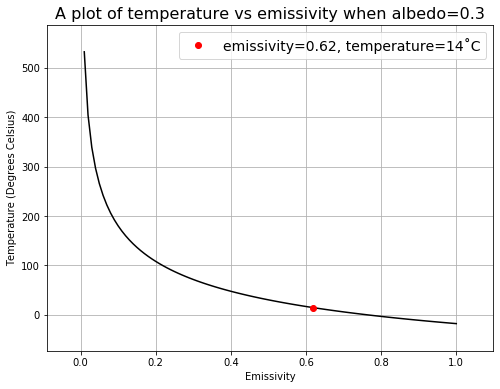

In [10]:
# define a function to find the temperature with a given emissivity
def find_new_temp(e, S_o=1365, al=0.3, s=5.67e-8):
    return ((S_o*(1-al))/(4*e*s))**0.25-273

# make a list of values of emissivity between 0.01 and 1
emissivity = np.array([0.01*i for i in range(1, 101)])

#calculate temperature with emissivity
new_temp = find_new_temp(emissivity)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure
ax1.plot(emissivity, new_temp, 'k')
# emissivity = 0.62 is at index 61
ax1.plot(emissivity[61], new_temp[61], 'ro', label='emissivity=%.2f, temperature=%.d˚C' % (emissivity[61], new_temp[61]))
ax1.set_xlabel('Emissivity')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature vs emissivity when albedo=0.3', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

At least now the temperature obtained is much more sensible. 

## Greenhouse effect

Let's first use binomial expansion on the equation linking absolute temperature ($T_K$), temperature in degrees Celsius ($T_C$), and conversion constant from degrees Celsius to Kelvin ($T_o=273$).

Recall that binomial expansion is $(1+x)^{n}≈(1+nx)$ when x<<1:

$$T_K=(T_o+T_C)$$

$$T_K^4=(T_o+T_C)^4=T_o^4(1+\frac{T_C}{T_o})^{4}≈T_o^4(1+4\frac{T_C}{T_o})$$

Substitute $T_K$ into Stefan-Boltzmann Law:

$$M_{out}=σT_K^{4}≈σ(T_o^4(1+4\frac{T_C}{T_o}))$$

In terms of total energy flux:

$$E_{out}=σ4\pi R_E^{2}(T_o^4(1+4\frac{T_C}{T_o}))$$

Including emissivity:

$$E_{out}=εσ4\pi R_E^{2}(T_o^4(1+4\frac{T_C}{T_o}))$$

$$=4\pi R_E^{2}(εσT_o^{4}+4εσT_o^{3}T_C)$$

$$=4\pi R_E^{2}(a+bT_C)$$

where $a=εσT_o^{4}$ and $b=4εσT_o^{3}$ are constants.

a is the constant coefficient for longwave radiation $= εσT_o^{4}$ $Wm^{-2}$

b is temperature-dependent coefficient for longwave radiation $= 4εσT_o^{3}$ $Wm^{-2}˚C^{-1}$

Since $E_{in}=E_{out}$ at radiative equilibrium:

$$S_o\pi R_E^2(1-α)=4\pi R_E^{2}(a+bT_C)$$

$$S_o(1-α)=4(a+bT_c)$$

$$\frac{1}{4}S_o(1-α)=a+bT_c$$

In the equation above, LHS gives <b>energy flux density into the Earth</b>, and RHS gives <b>energy flux density out of the Earth</b>.

Rearrange for $T_C$ gives:

$$T_C=\frac{\frac{1}{4}S_o(1-α)-a}{b}$$

In [11]:
# find values of a and b when emissivity = 0.62

# define a function to find the constant a
def find_a(e, s=5.67e-8, T_o=273):
    return e * s * T_o**4

# define a function to find the constant b
def find_b(e, s=5.67e-8, T_o=273):
    return 4 * e * s * T_o**3

constant_a = find_a(0.62)
constant_b = find_b(0.62)
print("When emissivity = 0.62, a=%.d W/m2 and b=%.d W/m2˚C." % (constant_a, constant_b))

When emissivity = 0.62, a=195 W/m2 and b=2 W/m2˚C.


Accounting for greenhouse effect, when emissivity is 0.62, temperature now is 15˚C


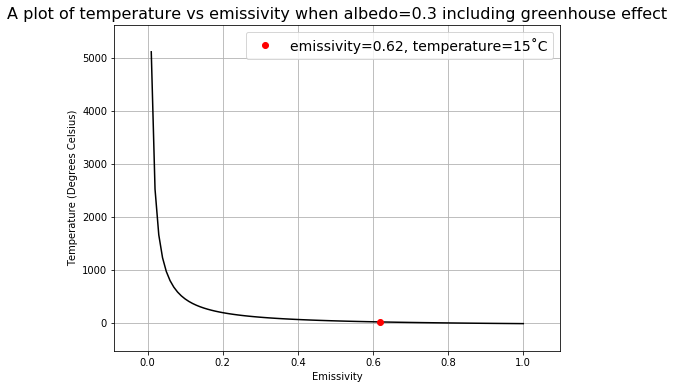

In [8]:
# define function for calculating T_C with a given emissivity
def find_TC(e, s=5.67e-8, T_o=273, S_o=1365, al=0.3):
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    return (0.25*S_o*(1-al)-a)/b

print("Accounting for greenhouse effect, when emissivity is 0.62, temperature now is %.d˚C" % (find_TC(0.62)))

# make a list of emissivity between 0.01 and 1
e = np.array([0.01*i for i in range(1, 101)])
T_C = find_TC(e)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure
ax1.plot(e, T_C, 'k')
ax1.plot(e[61], T_C[61], 'ro', label='emissivity=%.2f, temperature=%.d˚C' % (e[61], T_C[61]))
ax1.set_xlabel('Emissivity')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature vs emissivity when albedo=0.3 including greenhouse effect', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

As you can see, for the same set of values of emissivity, the temperature now is higher since the greenhouse effect is taken into account.

We can rewrite the equation above as:

$$T_C = \frac{M_{in}-a}{b} = \frac{M_{in}}{b}-\frac{a}{b}$$

Since $\frac{a}{b}$ is constant, we can write this in terms of change in temperature and change in incoming energy flux:

$$∆T_C = \frac{∆M_{in}}{b}$$

Therefore, the change in temperature is proportional to <b>radiative forcing</b>, the difference in energy flux density going in and out of the Earth. 

The radiative forcing associated with CO$_{2}$ gas of concentration [CO$_2$] compared to a base level concentration ot [CO$_2$]$_0$ can be approximated by:

$$∆M_{CO_2,in} = 5.35ln(\frac{[CO_2]}{[CO_2]_0})$$

For a doubling of CO$_2$, the radiative forcing would be:

$$∆M_{CO_2,in} = 5.35ln(2) = 3.7 Wm^{-2}$$

Substituting this back into the equation fo $T_C$:

$$∆T_{CO2} = \frac{3.7}{b}$$

The change in temperature from doubling concentration of CO$_2$ compared to pre-industrial levels is <b>climate sensibility</b>. 

Simplified approximations of radiative forcing caused by other greenhouse gases can be found in Table 3 in the paper __[Myhre et al.](https://en.wikipedia.org/wiki/Planck%27s_law)__


When CO2 concentration is doubled, temperature increases by 1˚C.


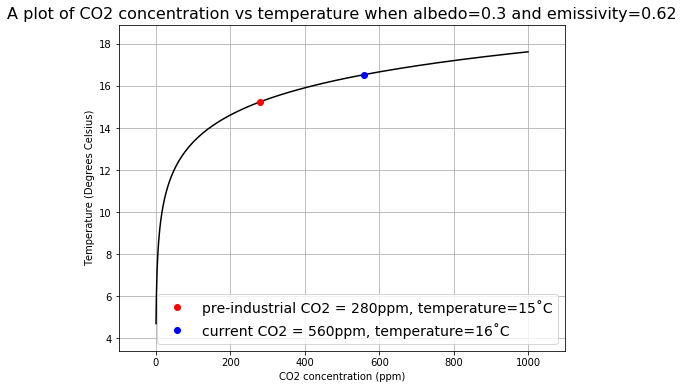

In [14]:
def find_newT(CO2_now, CO2_initial=280, e=0.62, s=5.67e-8, T_o=273, S_o=1365, al=0.3):
    dM = 5.35 * np.log(CO2_now/CO2_initial)
    M = 0.25*S_o*(1-al) + dM
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    return (M - a) / b

CO2_now = np.array([i for i in range(1,1000)])
temp_now = find_newT(CO2_now)

print("When CO2 concentration is doubled, temperature increases by %.d˚C." % (temp_now[559]-temp_now[279]))

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure
ax1.plot(CO2_now, temp_now, 'k')
ax1.plot(CO2_now[279], temp_now[279], 'ro', label='pre-industrial CO2 = %.dppm, temperature=%.d˚C' % (CO2_now[279], temp_now[279]))
ax1.plot(CO2_now[559], temp_now[559], 'bo', label='current CO2 = %.dppm, temperature=%.d˚C' % (CO2_now[559], temp_now[559]))
ax1.set_xlabel('CO2 concentration (ppm)')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of CO2 concentration vs temperature when albedo=0.3 and emissivity=0.62', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

## Storing heat 

Recall that heat capacity (C) is the energy (E) required to raise the temperature of a body of a material by 1˚C, independent of mass.

$C=\frac{E}{∆T}$ $J˚C^{-1}$

Given that most of the temperature change is due to the heat exchange with the top 70m layer of the ocean, we'll assume the contribution from land and deep ocean to heat storage is negligible, and that the ocean is 70m deep.

The density of seawater $ρ=1025kgm^{-3}$, specific heat capacity of water $c=4200Jkg^{-1}˚C^{-1}$, the fraction ($f$) which the Earth's surface is covered by ocean (70%), and depth of the ocean ($d$), we can calculate the heat capacity of the ocean per meter squared:

$$C=fρdc$$

You can verify this by looking at the units.

Substituting in the numbers, the Earth's heat capacity is $2.11*10^{8}Jm^{-2}˚C^{-1}$.

## Restoring equilibrium

The __[first law of thermodynamics](https://en.wikipedia.org/wiki/First_law_of_thermodynamics)__ states that the total energy in an isolated system is constant.

Treating the climate system as an isolated system, the rate of change in internal energy of the climate system must be balanced by the rate of net heating or cooling.

From above, we derived that energy flux density absorbed $M_{in}=\frac{1}{4}S_o(1-α)$, and energy flux density out $M_{out}=(a+bT_C)$, thus net heating/cooling is:

$$M_{in}-M_{out}=\frac{1}{4}S_o(1-α)-(a+bT_C)$$ 

The change in temperature per unit area per unit time is $C\frac{dT}{dt}$ (verify this by units).

Change in temperature is equivalent to change in kinetic energy i.e. internal energy of the system.

Therefore:

$$C\frac{dT}{dt}=\frac{1}{4}S_o(1-α)-(a+bT_C)$$

$$\frac{dT}{dt}=\frac{\frac{1}{4}S_o(1-α)-(a+bT_C)}{C}$$

To simplify, since T_C is merely a specific value of T:

$$\frac{dT}{dt}=\frac{\frac{1}{4}S_o(1-α)-(a+bT)}{C}$$

This equation accounts for the fact that when the system is out of equilibrium for whatever reason, it will try and restore equilibrium.

Solving this differential equation gives:

$$T=\frac{1}{b}(\frac{1}{4}S_o(1-α)-a-CDe^{-\frac{b}{c}t})=\frac{1}{b}(M_{in}-a-CDe^{-\frac{b}{c}t})$$

where D is an arbitrary constant determined by initial conditions:

$$D=\frac{\frac{1}{4}S_o(1-α)-a-T_{t=0}b}{C}$$

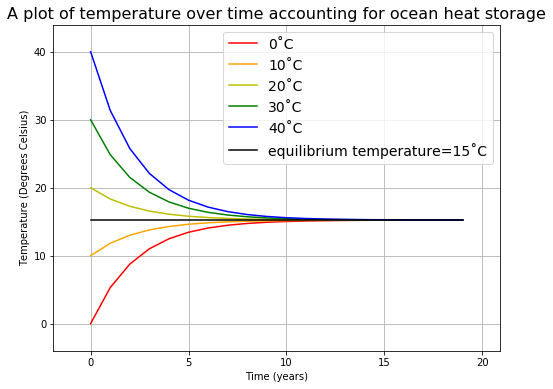

In [127]:
# define a function to calculate temp over time
def equilibrium_T(T_initial, t, e=0.62, al=0.3, C=2.11e8, S_o=1365, s=5.67e-8, T_o=273):
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    D = (0.25*S_o*(1-al)-a-T_initial*b)/(C)
    t = t*3600*24*365 # convert t from seconds to years
    return (1/b)*(0.25*S_o*(1-al)-a-C*D*np.exp(-b*t/C))

initial_T = np.array([i for i in range(0, 41, 10)])

t = np.array([i for i in range(20)])

T = {}
for i in range(len(initial_T)):
    T['temp='+str(initial_T[i])]=[]
    for j in range(len(t)):
        T['temp='+str(initial_T[i])].append(equilibrium_T(initial_T[i], t[j]))
        
    
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

def h(x):
    return 0*x+T['temp='+str(0)][-1]


# plot figure
ax1.plot(t, T['temp='+str(0)], 'r', label='0˚C')
ax1.plot(t, T['temp='+str(10)], 'orange', label='10˚C')
ax1.plot(t, T['temp='+str(20)], 'y', label='20˚C')
ax1.plot(t, T['temp='+str(30)], 'g', label='30˚C')
ax1.plot(t, T['temp='+str(40)], 'b', label='40˚C')
ax1.plot(t, h(t), 'k', label='equilibrium temperature=%.d˚C' % T['temp='+str(0)][-1])
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature over time accounting for ocean heat storage', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

## Ice-albedo positive feedback - tipping points

<img src="../images/ice-albedo-feedback.png" />

Assume that due to some perturbation: 
- the average temperature becomes lower than -10˚C, then the entire Earth freezes, albedo becomes 0.9
- the average temperature is between -10˚C and 10˚C, then the albedo is between 0.3 and 0.9, and this can be calculated by using ratios:

$$α=α_{ice}-(α_{ice}-α_{land})*\frac{T_{now}-T_{freeze}}{T_{melt}-T_{freeze}}$$

- the average temperare becomes higher than 10˚C, then the entire Earth's ice melts, albedo becomes 0.3

When a tipping point is reached e.g. temperature changes from 10˚C to 11˚C, albedo changes, leading to drastic changes in energy balance, thus equilibrium temperature also changes.

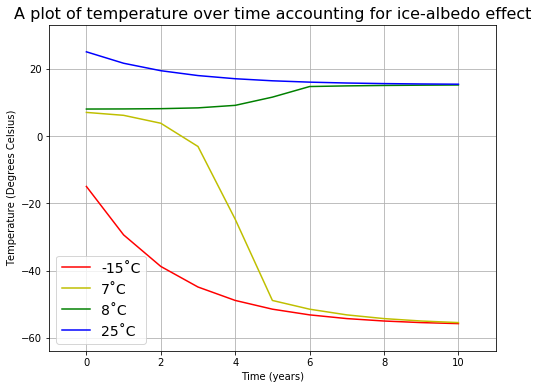

In [43]:
def find_al(T_initial, T_freeze=-10, T_melt=10, al_ice=0.9, al_land=0.3):
    if T_initial <= T_freeze:
        al = al_ice
    elif T_initial >= T_melt:
        al = al_land
    else:
        al = al_ice - (al_ice-al_land)*(T_initial-T_freeze)/(T_melt-T_freeze)
    return al
        
albedo = []
T_initial = np.array([10*i for i in range(-5, 6)])
for i in range(len(T_initial)):
    albedo.append(find_al(T_initial[i]))
albedo = np.array(albedo)

# define a function to calculate temp over time
def equilibrium_T_2(T_initial, years, e=0.62, C=2.11e8, S_o=1365, s=5.67e-8, T_o=273):
    temp = [T_initial]
    time = [0]
    t = 0
    while t < years:
        t += 1
        time.append(t)
        seconds = t * 3600 * 24 * 365.25
        if temp[-1] <= -10:
            al = 0.9
        elif temp[-1] >= 10:
            al = 0.3
        else:
            al = 0.9 - (0.9 - 0.3) * (temp[-1] + 10) / (20)
        a = e * s * T_o**4
        b = 4 * e * s * T_o**3
        D = (0.25*S_o*(1-al)-a-T_initial*b)/(C)
        temp.append((1/b)*(0.25*S_o*(1-al)-a-C*D*np.exp(-b*seconds/C)))
    return time, temp

time_minus10, temp_minus10 = equilibrium_T_2(-15, 10)
time_7, temp_7 = equilibrium_T_2(7, 10)
time_8, temp_8 = equilibrium_T_2(8, 10)
time_25, temp_25 = equilibrium_T_2(25, 10)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure
ax1.plot(time_minus15, temp_minus15, 'r', label='-15˚C')
ax1.plot(time_7, temp_7, 'y', label='7˚C')
ax1.plot(time_8, temp_8, 'g', label='8˚C')
ax1.plot(time_25, temp_25, 'b', label='25˚C')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature over time accounting for ice-albedo effect', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

In this case, the tipping point is between 7˚C and 8˚C, resulting in two different equilibrium temperatures.

## Final model

Now, let's include all the concepts above into this final model.

The initial conditions set are temperature of 14˚C and CO$_2$ concentration of 280ppm, but feel free to change them.

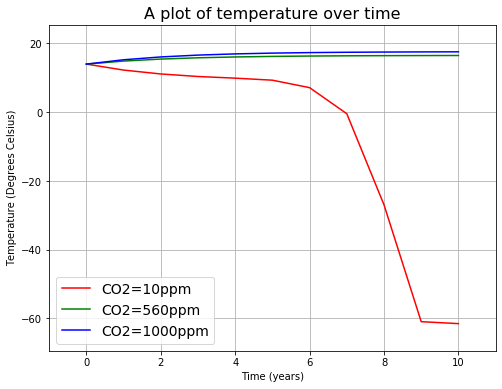

In [10]:
def climate_model(final_co2, years, current_temp=14, current_co2=280, e=0.62, S_o=1365, T_o=273, s=5.67e-8, f=0.7, d=70, p=1025, c=4200):
    time = [0]
    temperature = [14]
    t = 0
    total_t = years
    al = 0.3
    dM_in = 5.35 * np.log(final_co2/current_co2)
    C = 0.7 * 70 * 1025 * 4200
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    while t < total_t:
        t += 1
        time.append(t)
        seconds = t * 3600 * 24 * 365.25
        if temperature[-1] <= -10:
            al = 0.9
        elif temperature[-1] >= 10:
            al = 0.3
        else:
            al = 0.9 - (0.9-0.3)*(temperature[-1]+10)/(20)
        M_in = 0.25*S_o*(1-al) + dM_in
        D = (M_in-a-current_temp*b)/(C)
        temperature.append((1/b)*(M_in-a-C*D*np.exp(-b*seconds/C)))
    return time, temperature
    

time0, temperature0 = climate_model(10, 10)
time1, temperature1 = climate_model(560, 10)
time2, temperature2 = climate_model(1000, 10)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure

ax1.plot(time0, temperature0, 'r', label='CO2=10ppm')
ax1.plot(time1, temperature1, 'g', label='CO2=560ppm')
ax1.plot(time2, temperature2, 'b', label='CO2=1000ppm')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature over time', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

## Conclusion

Of course this model is still very crude. There are still plenty of things that it doesn't take into account, such as clouds, position of continents, vegetation, etc. In a real climate model, other factors also have to be included such as atmospheric dynamics, climate variability, human activity, and much more. 

However, this example shows how scientists build climate models by using physical equations, making approximations and aassumptions, inserting parameters into those equations to account for any variability, and adjusting their values so that it resembles the real world every time it is run.

### References

- Lecture materials in the Climate module
-  __[Penn State](https://www.e-education.psu.edu/meteo469/node/135)__
-  __[New York University Maths Department](https://math.nyu.edu/faculty/kleeman/zero_dim_ebm.html)__